# Анализ бизнес показателей приложения Procrastinate Pro+

# Описание исследования

В нашем распоряжении  данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года развлекательного приложения Procrastinate Pro+. Есть: лог сервера с данными об их посещениях, выгрузка их покупок за этот период, рекламные расходы. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки.

# Цель исследования

Разобраться в причинах убытков развлекательного приложения Procrastinate Pro+ и помочь компании выйти в плюс.

# Задачи исследования

1. Оценить представленные данные.
2. Выполнить предобработку данных.
3. Провести исследовательский анализ данных.

# Исходные данные

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Region — страна пользователя,
    Device — тип устройства пользователя,
    Channel — идентификатор источника перехода,
    Session Start — дата и время начала сессии,
    Session End — дата и время окончания сессии.

Структура orders_info_short.csv:

    User Id — уникальный идентификатор пользователя,
    Event Dt — дата и время покупки,
    Revenue — сумма заказа.

Структура costs_info_short.csv:

    dt — дата проведения рекламной кампании,
    Channel — идентификатор рекламного источника,
    costs — расходы на эту кампанию.

# Данное исследование разделим на несколько частей

## Загрузим данные и подготовим их к анализу

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import warnings

### Cчитаем данные из csv-файла в датафрейм и сохраним в переменные visits, orders и costs

In [2]:
visits = pd.read_csv(r'C:\Users\Равиль\Проекты для портфолио\2. Анализ бизнес показателей\visits_info_short.csv')
orders = pd.read_csv(r'C:\Users\Равиль\Проекты для портфолио\2. Анализ бизнес показателей\orders_info_short.csv')
costs = pd.read_csv(r'C:\Users\Равиль\Проекты для портфолио\2. Анализ бизнес показателей\costs_info_short.csv')

### Изучим общую информацию о датафрейме visits

In [3]:
visits.head(10)

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

### Изучим общую информацию о датафрейме orders

In [4]:
orders.head(10)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

### Изучим общую информацию о датафрейме costs

In [5]:
costs.head(10)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

### Выведем основную информацию о датафреймах visits, orders и costs

In [6]:
visits.info()
print()
orders.info()
print()
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column 

### Опеределим сколько всего есть пропущенных значений в датафреймах visits, orders и costs

In [7]:
print(visits.isna().sum().sort_values(ascending=False))
print()
print(orders.isna().sum().sort_values(ascending=False))
print()
print(costs.isna().sum().sort_values(ascending=False))

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

User Id     0
Event Dt    0
Revenue     0
dtype: int64

dt         0
Channel    0
costs      0
dtype: int64


### Проверим есть ли явные дубликаты в датафреймах visits, orders и costs

In [8]:
print(visits.duplicated().sum())
print()
print(orders.duplicated().sum())
print()
print(costs.duplicated().sum())

0

0

0


### Переименуем столбцы датафрейма visits, приведя их к нижнему регистру и добавив нижнее подчеркивание между словами

In [9]:
visits.rename(columns={'User Id':'user_id', 'Region':'region', 'Device':'device', 'Channel':'channel',\
                       'Session Start':'session_start', 'Session End':'session_end'}, inplace=True)
visits.head()

user_id         region   device  channel        session_start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           session_end  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

### Переименуем столбцы датафрейма orders, приведя их к нижнему регистру и добавив нижнее подчеркивание между словами

In [10]:
orders.rename(columns={'User Id':'user_id', 'Event Dt':'event_dt', 'Revenue':'revenue'}, inplace=True)
orders.head()

user_id             event_dt  revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

### Переименуем столбцы датафрейма costs, приведя их к нижнему регистру

In [11]:
costs.rename(columns={'Channel':'channel'}, inplace=True)
costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

### Сменим тип данных столбцов session_start и session_end датафрейма visits с object на datetime и оценим результат смены

In [12]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
print(visits.info())
visits.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
None


user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

### Сменим тип данных столбца event_dt датафрейма orders с object на datetime и оценим результат смены

In [13]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
print(orders.info())
orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB
None


user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

### Сменим тип данных столбца dt датафрейма costs с object на datetime и оценим результат смены

In [14]:
costs['dt'] = pd.to_datetime(costs['dt']).dt.date
print(costs.info())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None


dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

### Выводы по 1 разделу

Таблица visits содежит 6 столбцов в которой имеются целые числа и строки. Таблица orders содержит 3 столбца в которой имеются целые, вещественны числа и строки. Таблица costs содержит 3 столбца в которой имеются вещественны числа и строки. В данных таблицах нет пропусков и явных дубликатов. Учитывая содержание столбцов в данных таблицах проверка на неявные дубликаты не имеет смысла. Для удобства работы с датафреймами названия некоторых столбцов были переименованы в нижний регистр с нижним подчеркиванием между словами. Для последующего анализа были преобразованы из типа строк в формат даты и времени были столбцы session_start и session_end в таблице visits, event_dt в таблице orders и dt в таблице costs.

## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

### Создадим функцию get_profiles для создания профилей пользователей

In [15]:
def get_profiles(visits, orders, costs):

    # находим параметры первых посещений
    profiles = (
        visits.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    costs = costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    costs['acquisition_cost'] = costs['costs'] / costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

### Создадим функцию get_retention для подсчёта Retention Rate

In [16]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Создадим функцию get_conversion для подсчёта конверсии

In [17]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

### Создадим функцию get_ltv для подсчёта LTV

In [18]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

### Создадим функцию filter_data для сглаживания данных

In [19]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

### Создадим функцию plot_retention для построения графика Retention Rate

In [20]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

### Создадим функцию plot_conversion() для построения графика конверсии

In [21]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Создадим функцию plot_ltv_roi — для визуализации LTV и ROI

In [22]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

### Выводы по 2 разделу

1. Заданы следующие функции для вычисления значений метрик: get_profiles() — для создания профилей пользователей, get_retention() — для подсчёта Retention Rate, get_conversion() — для подсчёта конверсии, get_ltv() — для подсчёта LTV.
2. Заданы следующие функции для построения графиков: filter_data() — для сглаживания данных, plot_retention() — для построения графика Retention Rate, plot_conversion() — для построения графика конверсии, plot_ltv_roi — для визуализации LTV и ROI.

## Исследовательский анализ данных

### Построим пользовательские профили, используя ранее заданную функцию get_profiles

In [23]:
profiles = get_profiles(visits, orders, costs)
profiles.head(10)

user_id            first_ts       channel   device         region  \
0    599326 2019-05-07 20:58:57      FaceBoom      Mac  United States   
1   4919697 2019-07-09 12:46:07      FaceBoom   iPhone  United States   
2   6085896 2019-10-01 09:58:33       organic   iPhone         France   
3  22593348 2019-08-22 21:35:48    AdNonSense       PC        Germany   
4  31989216 2019-10-02 00:07:44       YRabbit   iPhone  United States   
5  34186288 2019-05-09 17:29:23       organic  Android  United States   
6  38448301 2019-08-16 11:56:00       organic  Android  United States   
7  46006712 2019-06-30 03:46:29    AdNonSense  Android         France   
8  58263264 2019-05-11 19:18:43      FaceBoom   iPhone  United States   
9  59835779 2019-05-11 21:13:47  MediaTornado   iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769  
5  2019-05-09 2019-05-01  False          0.000000  
6  2019-08-16 2019-08-01  False          0.000000  
7  2019-06-30 2019-06-01   True          1.008000  
8  2019-05-11 2019-05-01  False          1.128205  
9  2019-05-11 2019-05-01  False          0.250435

### Оценим общее количество уникальных пользователей

In [24]:
total_users_count = profiles['user_id'].count()
total_users_count

150008

### Оценим общее количество платящих пользователей

In [25]:
count_paying_users = profiles['user_id'].loc[profiles['payer'] == True].count()
count_paying_users

8881

### Оценим общую долю платящих пользователей в процентах

In [26]:
total_share_paying_users = round((count_paying_users / total_users_count)*100, 2)
total_share_paying_users

5.92

### Определим минимальную и максимальную даты привлечения пользователей

In [27]:
profiles['dt'].agg({'min','max'})

min    2019-05-01
max    2019-10-27
Name: dt, dtype: object

### Построим сводную таблицу paying_users_region методом pivot_table() со следующими столбцами:
    region - страна пользователя
    users_count - общее количество пользователей по странам пользователей
    paying_users_count - количество платящих пользователей по странам пользователей
    paying_users_percent - доля платящих пользователей от общего количества по странам пользователей в процентах

In [28]:
paying_users_region = profiles.pivot_table(index='region', values='user_id', aggfunc='count').reset_index()
paying_users_region.columns = ['region', 'users_count']
paying_users_region['paying_users_count'] = profiles[profiles['payer'] == True].groupby('region')\
                                     ['user_id'].count().reset_index(drop=True)
paying_users_region['paying_users_percent'] = round((paying_users_region['paying_users_count'] /\
                                                     paying_users_region['users_count']) * 100, 2)
paying_users_region = paying_users_region.sort_values(by='paying_users_percent', ascending=False).reset_index(drop=True)
paying_users_region

region  users_count  paying_users_count  paying_users_percent
0  United States       100002                6902                  6.90
1        Germany        14981                 616                  4.11
2             UK        17575                 700                  3.98
3         France        17450                 663                  3.80

### Напишем функцию make_pivot, которая будет строить данную сводную таблицу в зависимости от изучаемого столбца в датафрейме и проверим ее работу

In [29]:
def make_pivot(col1):
    data_pivot = profiles.pivot_table(index = col1, values = 'user_id', aggfunc = 'count').reset_index()
    data_pivot.columns = [col1, 'users_count']
    data_pivot['paying_users_count'] = profiles[profiles['payer'] == True].groupby(col1)\
                                       ['user_id'].count().reset_index(drop=True)
    data_pivot['paying_users_percent'] = round((data_pivot['paying_users_count'] /\
                                                data_pivot['users_count']) * 100, 2)
    data_pivot = data_pivot.sort_values(by='paying_users_percent', ascending=False).reset_index(drop=True)
    return data_pivot

make_pivot('region')

region  users_count  paying_users_count  paying_users_percent
0  United States       100002                6902                  6.90
1        Germany        14981                 616                  4.11
2             UK        17575                 700                  3.98
3         France        17450                 663                  3.80

### Построим сводную таблицу методом pivot_table() с помощью ранее созданной функции make_pivot  со следующими столбцами:
    device - тип устройства пользователя
    users_count - общее количество пользователей по типу устройства пользователя
    paying_users_count - количество платящих пользователей по типу устройства пользователя
    paying_users_percent - доля платящих пользователей от общего количества пользователей по типу устройства пользователя в процентах

In [30]:
make_pivot('device')

device  users_count  paying_users_count  paying_users_percent
0      Mac        30042                1912                  6.36
1   iPhone        54479                3382                  6.21
2  Android        35032                2050                  5.85
3       PC        30455                1537                  5.05

### Построим сводную таблицу методом pivot_table() с помощью ранее созданной функции make_pivot  со следующими столбцами:
    channel - идентификатор рекламного источника
    users_count - общее количество пользователей по рекламному источнику
    paying_users_count - количество платящих пользователей по рекламному источнику
    paying_users_percent - доля платящих пользователей от общего количества пользователей по рекламному источнику в
    процентах

In [31]:
make_pivot('channel')

channel  users_count  paying_users_count  paying_users_percent
0             FaceBoom        29144                3557                 12.20
1           AdNonSense         3880                 440                 11.34
2       lambdaMediaAds         2149                 225                 10.47
3               TipTop        19561                1878                  9.60
4       RocketSuperAds         4448                 352                  7.91
5       WahooNetBanner         8553                 453                  5.30
6              YRabbit         4312                 165                  3.83
7         MediaTornado         4364                 156                  3.57
8              LeapBob         8553                 262                  3.06
9   OppleCreativeMedia         8605                 233                  2.71
10             organic        56439                1160                  2.06

### Выводы по 3 разделу

1. Всего насчитывается 150 008 пользователей, которые пришли в приложение Procrastinate Pro+. Из них количество платящих пользователей составляет 8881 или 5.92 %.
2. Минимальная дата привлечения пользователей 01.05.2019. Максимальная дата привлечения пользователей 27.10.2019.
3. Пользователи приходят из США, Германии, Великобритании и Франции. Больше всего платящих пользователей в приложение пришло из США 6902 пользователя или 6.9 %. Меньше всего пришло из Франции 663 пользователя или 3.8 %.
4. Пользователи пользуются такими устройствами как MacBook, iPhone, Android и персональными компьютерами. Платящие пользователи предпочитают устройства типа MacBook. Среди них наибольшая доля платящих (6.36 % или 1912 пользователей). Меньше всего доля платящих пользователей с песрональных компьютеров (5.05 % или 1537 пользователей).
5. Пользователи привлекались через 10 различных рекламных источников. Наибольшая доля платящих пользователей была привлечена через такие рекламные источники как FaceBoom (12.2 % или 3557 пользователей), AdNonSense (11.34 % или 440 пользователей) и lambdaMediaAds (10.47 % или 225 пользователей). Доля платящих пользователей, привлченных через другие рекламные источники, составляет менее 10 %.

## Маркетинг

### Оценим общую сумму расходов на маркетинг

In [32]:
total_marketing_expenses = round(costs['costs'].sum(), 2)
total_marketing_expenses

105497.3

### Построим сводную таблицу expenses_by_source методом pivot_table() со следующими столбцами:
    channel - идентификатор рекламного источника
    costs_sum - расходы по каждому рекламного источнику привлечения пользователя
    costs_sum_percent - доля расходов по каждому рекламного источника привлечения пользователя в процентах

In [33]:
expenses_by_source = costs.pivot_table(index='channel', values='costs', aggfunc='sum').reset_index()
expenses_by_source.columns = ['channel', 'costs_sum']
expenses_by_source['costs_sum_percent'] = round((expenses_by_source['costs_sum'] / total_marketing_expenses) * 100, 2)
expenses_by_source = expenses_by_source.sort_values(by='costs_sum', ascending=False).reset_index(drop=True)
expenses_by_source

channel  costs_sum  costs_sum_percent
0              TipTop   54751.30              51.90
1            FaceBoom   32445.60              30.75
2      WahooNetBanner    5151.00               4.88
3          AdNonSense    3911.25               3.71
4  OppleCreativeMedia    2151.25               2.04
5      RocketSuperAds    1833.00               1.74
6             LeapBob    1797.60               1.70
7      lambdaMediaAds    1557.60               1.48
8        MediaTornado     954.48               0.90
9             YRabbit     944.22               0.90

### Сменим тип данных столбца dt датафрейма costs с object на datetime и оценим результат смены

In [34]:
costs['dt'] = pd.to_datetime(costs['dt'])
print(costs.info())
costs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB
None


dt   channel  costs
0 2019-05-01  FaceBoom  113.3
1 2019-05-02  FaceBoom   78.1
2 2019-05-03  FaceBoom   85.8
3 2019-05-04  FaceBoom  136.4
4 2019-05-05  FaceBoom  122.1

### Добавим новые столбцы в таблицу costs с номерам недель и номерами меясцев привлечения пользователей и оценим результат добавления

In [35]:
costs['week'] = costs['dt'].dt.isocalendar().week
costs['month'] = costs['dt'].dt.month
costs.head(10)

dt   channel  costs  week  month
0 2019-05-01  FaceBoom  113.3    18      5
1 2019-05-02  FaceBoom   78.1    18      5
2 2019-05-03  FaceBoom   85.8    18      5
3 2019-05-04  FaceBoom  136.4    18      5
4 2019-05-05  FaceBoom  122.1    18      5
5 2019-05-06  FaceBoom  118.8    19      5
6 2019-05-07  FaceBoom  101.2    19      5
7 2019-05-08  FaceBoom  100.1    19      5
8 2019-05-09  FaceBoom   93.5    19      5
9 2019-05-10  FaceBoom  104.5    19      5

### Построим сводную таблицу expenses_by_week методом pivot_table() со следующими столбцами:
    week - номер недели привлечения пользователей
    channel - идентификатор рекламного источника
    costs_by_week - расходы на маркетинг по каждому рекламному источнику за неделю

In [36]:
expenses_by_week = costs.pivot_table(index={'week', 'channel'}, values='costs', aggfunc='sum').reset_index()
expenses_by_week = expenses_by_week[['week', 'channel', 'costs']]
expenses_by_week.columns = ['week', 'channel', 'costs_by_week']
expenses_by_week.head(15)

week             channel  costs_by_week
0     18          AdNonSense         211.05
1     18            FaceBoom         535.70
2     18             LeapBob          16.80
3     18        MediaTornado          38.64
4     18  OppleCreativeMedia          24.00
5     18      RocketSuperAds          99.45
6     18              TipTop         347.00
7     18      WahooNetBanner          49.20
8     18             YRabbit          52.20
9     18      lambdaMediaAds          81.60
10    19          AdNonSense         273.00
11    19            FaceBoom         750.20
12    19             LeapBob          31.71
13    19        MediaTornado          61.68
14    19  OppleCreativeMedia          34.50

### Построим сводную таблицу expenses_by_week методом pivot_table() со следующими столбцами:
    month - месяц привлечения пользователей
    channel - идентификатор рекламного источника
    costs_by_month - расходы на маркетинг по каждому рекламному источнику за месяц

In [37]:
expenses_by_month = costs.pivot_table(index=['month', 'channel'], values='costs', aggfunc='sum').reset_index()
expenses_by_month = expenses_by_month[['month', 'channel', 'costs']]
expenses_by_month.columns = ['month', 'channel', 'costs_by_month']
expenses_by_month.head(15)

month             channel  costs_by_month
0       5          AdNonSense         1169.70
1       5            FaceBoom         3524.40
2       5             LeapBob          140.28
3       5        MediaTornado          238.56
4       5  OppleCreativeMedia          169.75
5       5      RocketSuperAds          577.98
6       5              TipTop         2981.00
7       5      WahooNetBanner          418.80
8       5             YRabbit          299.70
9       5      lambdaMediaAds          458.40
10      6          AdNonSense          538.65
11      6            FaceBoom         5501.10
12      6             LeapBob          314.58
13      6        MediaTornado          138.00
14      6  OppleCreativeMedia          370.00

### Построим график динамики изменения расходов на маркетинг по неделям по данным сводной таблицы expenses_by_week

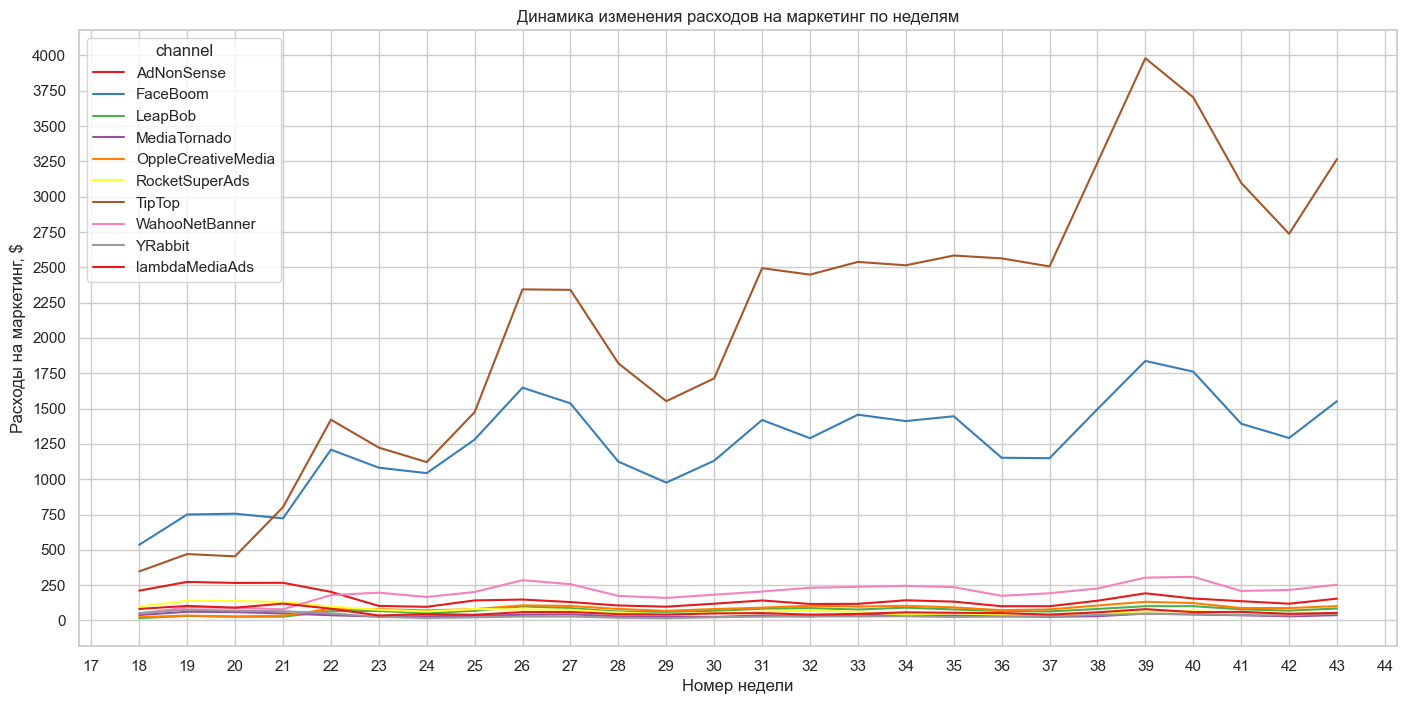

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(17, 8))
sns.lineplot(x='week', y='costs_by_week', hue='channel', data=expenses_by_week, palette="Set1")
plt.xlabel('Номер недели')
plt.ylabel('Расходы на маркетинг, $')
plt.title('Динамика изменения расходов на маркетинг по неделям')
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(1))
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(250))
plt.show()

### Построим график динамики изменения расходов на маркетинг по месяцам по данным сводной таблицы expenses_by_month

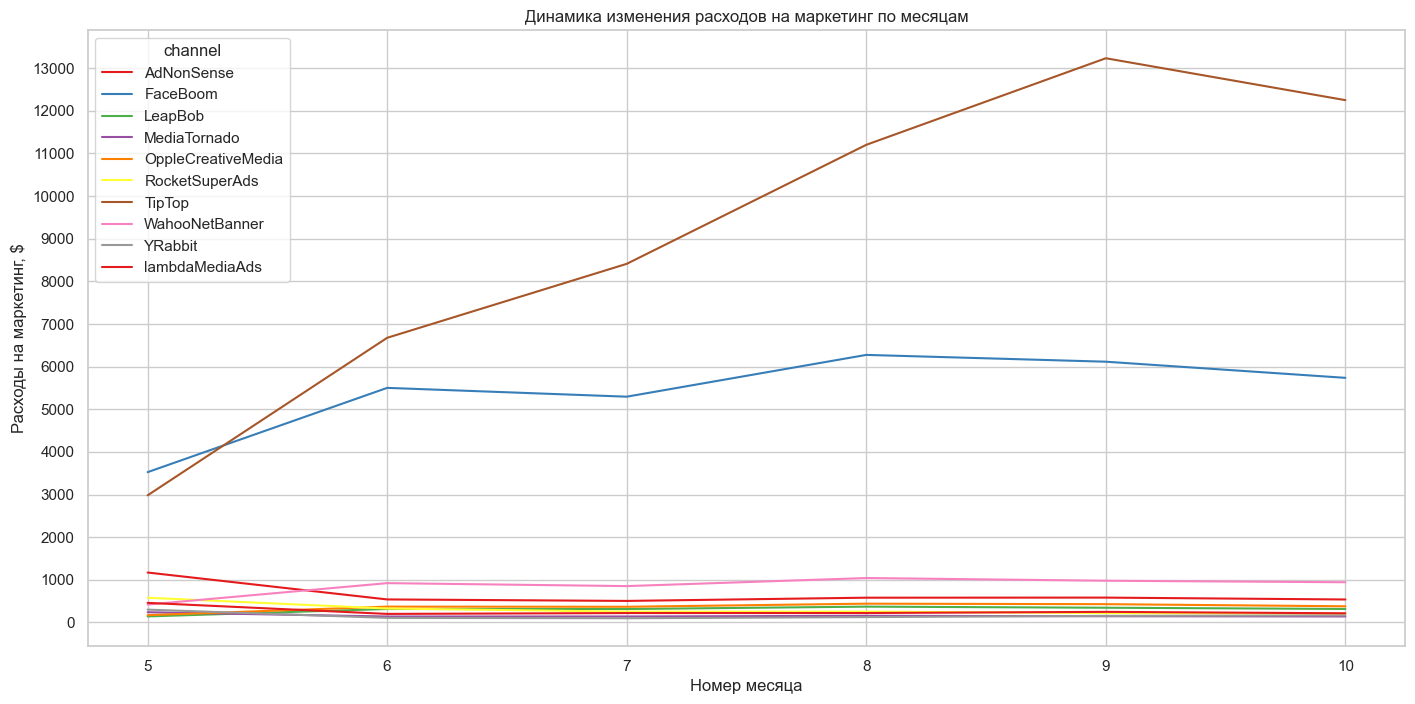

In [39]:
sns.set(style="whitegrid")
plt.figure(figsize=(17, 8))
sns.lineplot(x='month', y='costs_by_month', hue='channel', data=expenses_by_month, palette="Set1")
plt.xlabel('Номер месяца')
plt.ylabel('Расходы на маркетинг, $')
plt.title('Динамика изменения расходов на маркетинг по месяцам')
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1000))
plt.show()

### Построим сводную таблицу mean_cost_attraction методом pivot_table() со следующими столбцами:
    channel - идентификатор рекламного источника
    acquisition_cost_median - средняя стоимость привлечения пользователя по рекламным источникам (CAC)

In [40]:
mean_cost_attraction = profiles.pivot_table(index= 'channel', values='acquisition_cost', aggfunc='median').reset_index()
mean_cost_attraction.columns = ['channel', 'acquisition_cost_median']
mean_cost_attraction['acquisition_cost_median'] = mean_cost_attraction['acquisition_cost_median'].round(2)
mean_cost_attraction = mean_cost_attraction.sort_values(by='acquisition_cost_median', ascending=False).reset_index(drop=True)
mean_cost_attraction

channel  acquisition_cost_median
0               TipTop                     3.00
1             FaceBoom                     1.11
2           AdNonSense                     1.00
3       lambdaMediaAds                     0.73
4       WahooNetBanner                     0.60
5       RocketSuperAds                     0.40
6   OppleCreativeMedia                     0.25
7         MediaTornado                     0.22
8              LeapBob                     0.21
9              YRabbit                     0.21
10             organic                     0.00

### Выводы по разделу 4

1. Всего на маркетинг было потрачено 105497.3 долларов.
2. Пользователи привлекались через 10 различных рекламных источников. Самые крупны рекламные источники с точки зрения расходов - это TipTop. На него было потрачено 54751.30 долларов или 51.9 % от общей суммы. Второй рекламнй источник по расходам - FaceBoom, где было потрачено 32445.60 долларов или 30.75%. Доля расходов в остальных рекламных источниках не превышает 5%.
3. Если рассматривать динамику изменения расходов на маркетинг по месяцам, мы видим, что в течении всей рекламной кампании расходы на рекламу в рекламнных источниках TipTop и FaceBoom росли. Максимальный пик расходов за месяц по рекламному источнику TipTop был в сентябре 2019 года и составлял около 13100 долларов. Далее в октябре 2019 расходы по данному источнику пошли на спад. Максимальный пик расходов за месяц по рекламному источнику FaceBoom был в августе 2019 года и составлял около 6200 долларов. В сентябре и октябре 2019 расходы по данному источнику пошли на спад. Расходы в других рекламных источниках в течении всей рекламной кампании оставались примерно на одном и том же уровне и составляли за месяц примерно от 100 и до 1000 долларов. Динамика изменения расходов на маркетинг по неделям повторяет общую теденцию по расходам за месяц, однако здесь уже отмечаются как рост так и спад расходов по неделям в рамках одного месяца.
4. Наибольшая средняя стоимость привлечения одного пользователя отмечается в рекламном источнике TipTop - 3 доллара, далее идут источники FaceBoom - 1.11 долларов и AdNonSense - 1 доллар. Средняя стоимость привлечения одного пользователя в других источниках составляет менее 1 доллара. Наименьшая средняя стоимость привлечения одного пользователя отмечается в рекламном источнике YRabbit и составляет 0.21 доллара.

## Оценка окупаемости рекламы

### Установим момент и горизонт анализа данных

In [41]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

### Исключим из профилей оранических пользователей, так как в нашу задачу входит именно анализ окупаемости рекламы, а не всего бизнеса в целом

In [42]:
profiles = profiles.query('channel != "organic"')

### Рассчитаем и визуализируем LTV и ROI, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

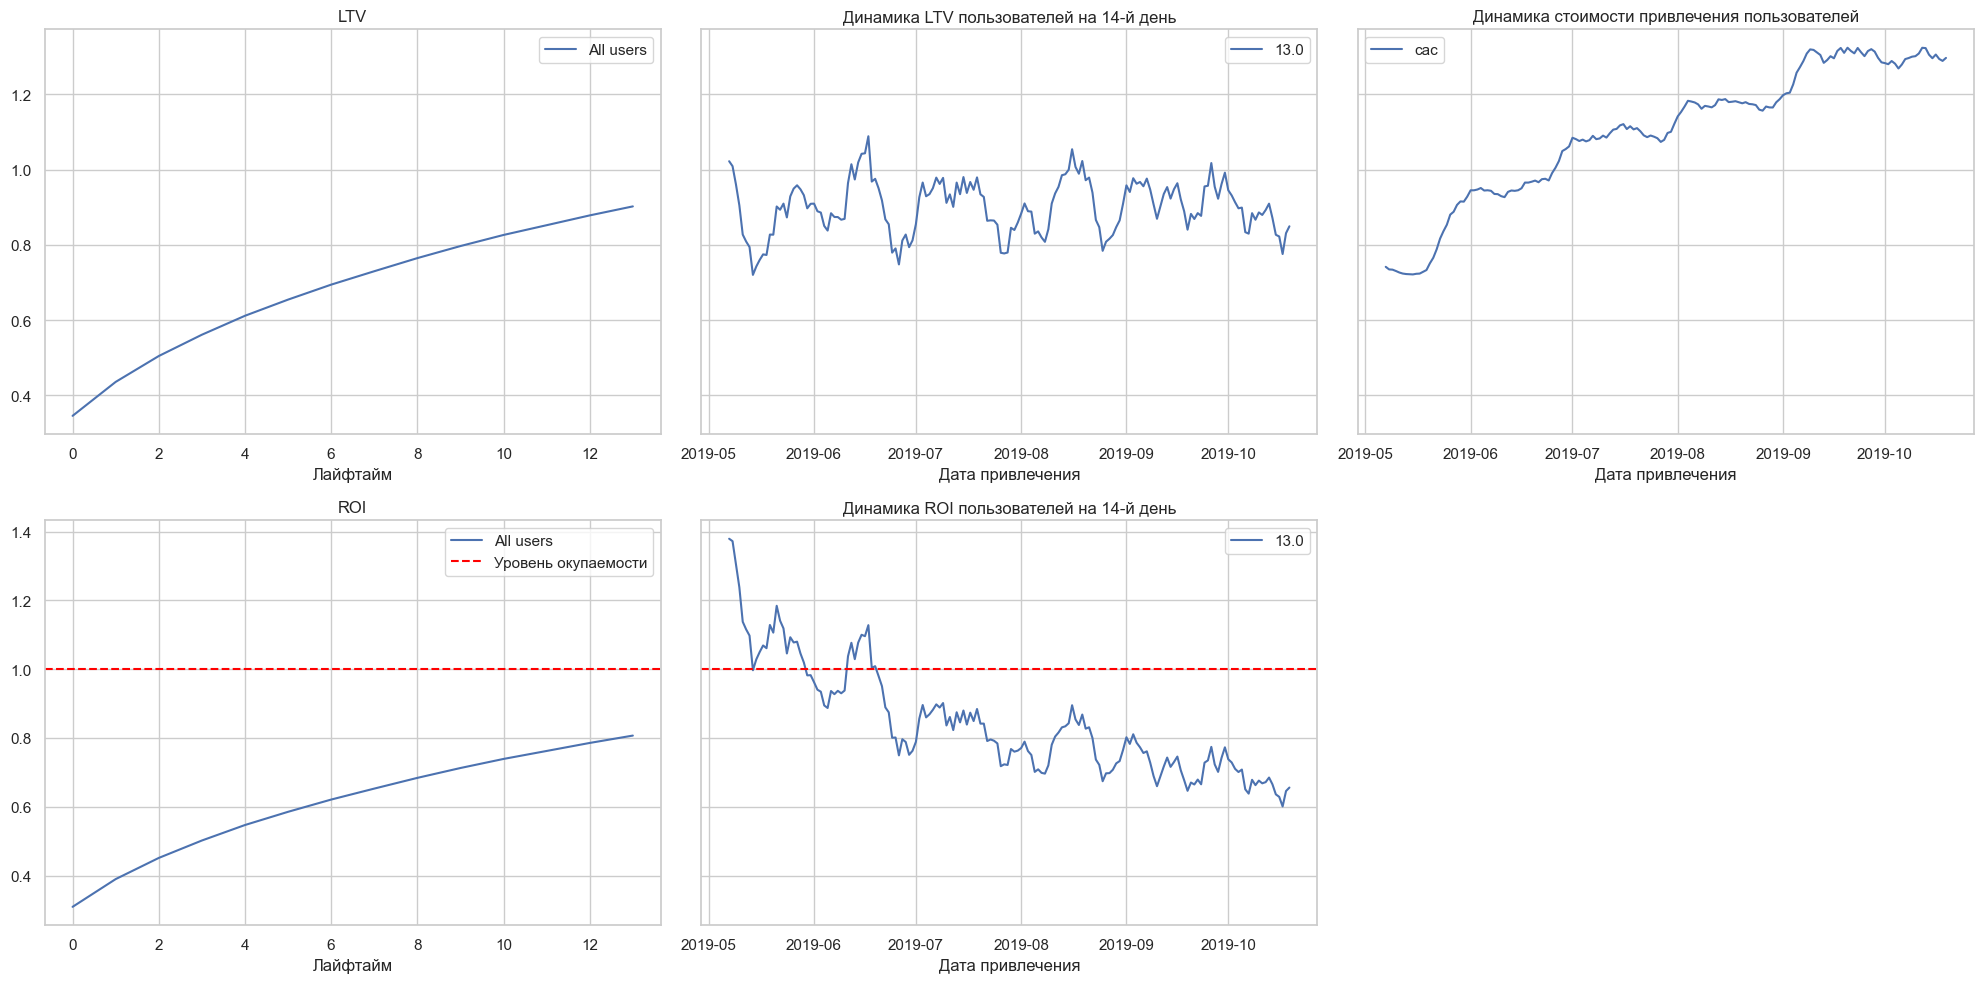

In [43]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles, orders, observation_date, horizon_days)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

#### Выводы по графику
1. В целом рекламная компания не окупилиась. ROI в конце второй недели составлял чуть выше 80%.
2. Стоимость привлечения пользователей (CAC) практически постоянно увеличивалась со старта и до конца рекламной компании, начинаясь примерно с 0,7 долларов на старте и заканчиваясь примерно 1,3 долларами в конце.
3. В динамике LTV не имеет какой-либо четкой направленности к снижению или падению и в среднем составляла около 0.9 долларов.
4. Судя по динамие ROI пользователей на 14 день рекламная компания окупалась примерно до середины июня. После этого времени далее она оставалсь убыточной.

### Рассчитаем и визуализируем LTV и ROI с разбивкой по типам устройств пользователей, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

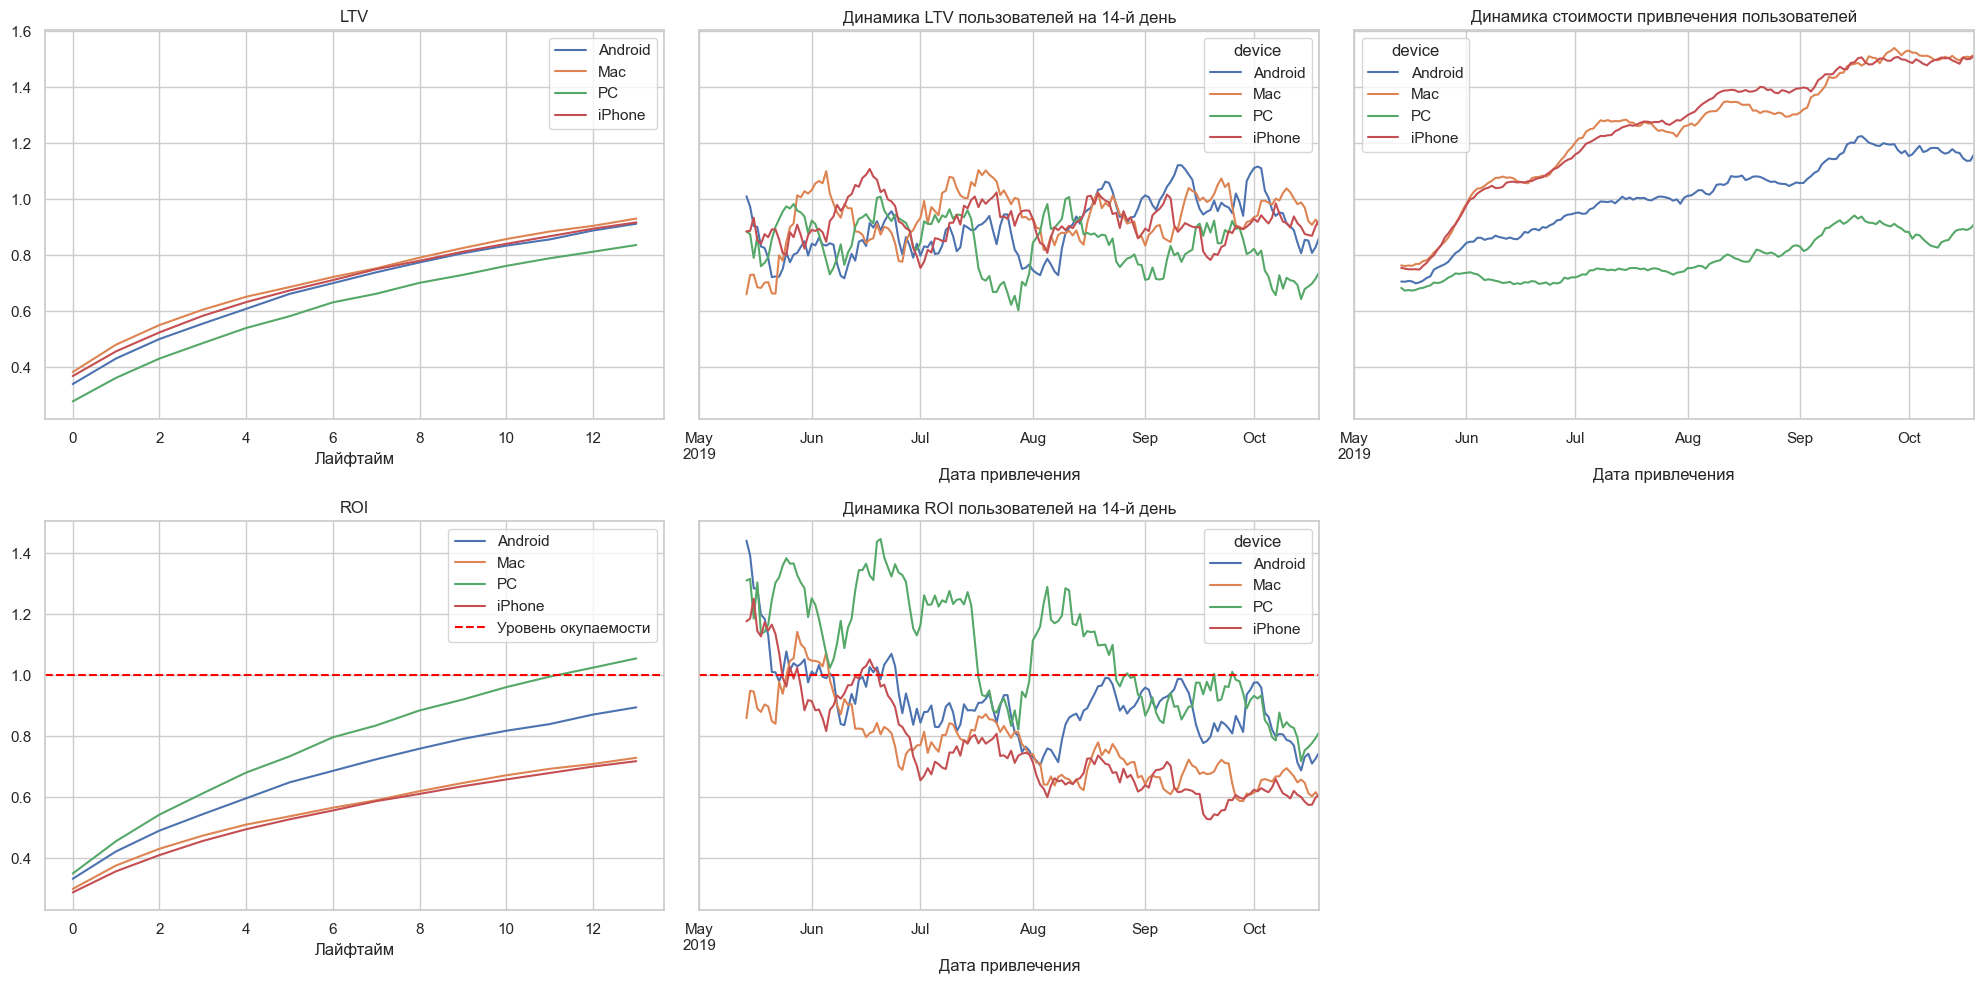

In [44]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы по графику
В разбивке по устройствам окупились только пользователи с PC. Их окупаемось составила около 105%. Пользователи с Android, MacBook и Iphone не окупились. Самая низкая стоимость привлечения пользователей именно с PC. На пике в середине сентября она составляла около 0,9 долларов. При этом LTV пользователей с PC немного ниже остальных.

### Рассчитаем и визуализируем LTV и ROI с разбивкой по странам привлечния пользователей, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

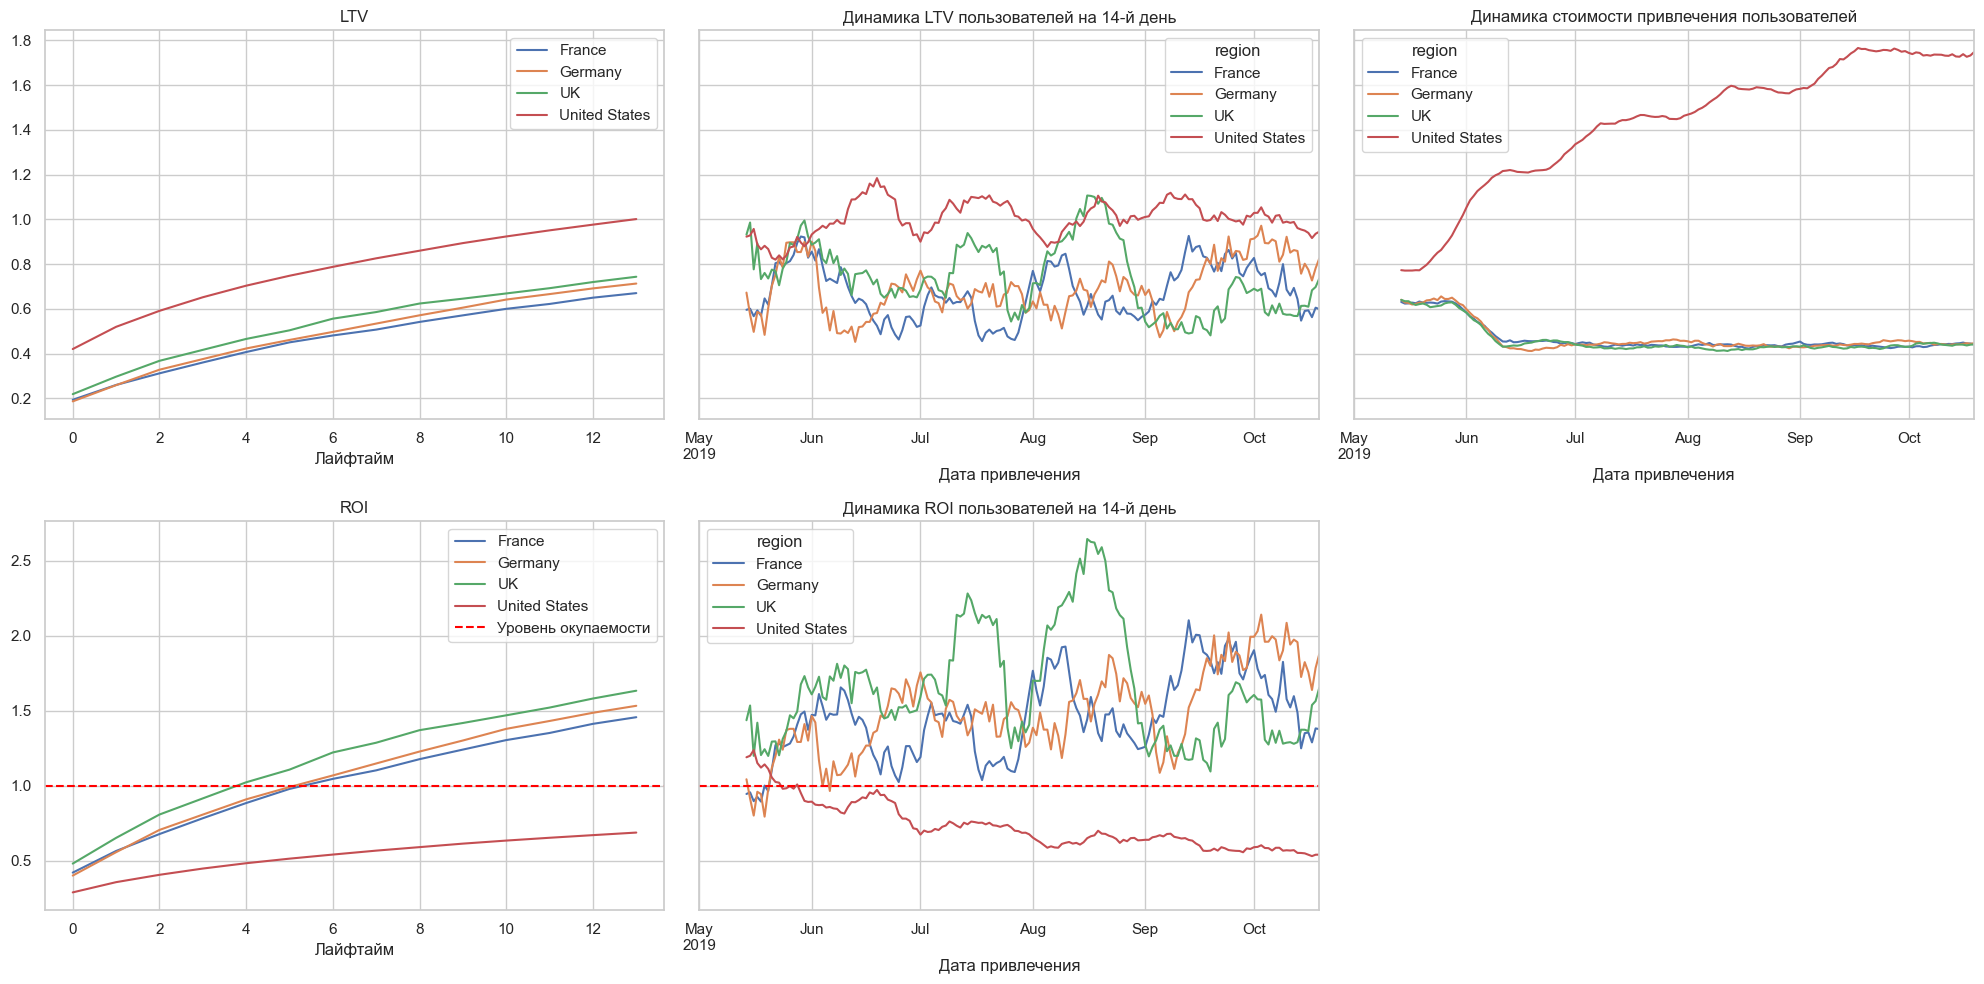

In [45]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы по графику
В разбивке по странам привлечения окупились все страны кроме США (ROI на конец второй недели составляет около 60%) при том, что LTV у данных пользователей самый высокий. При этом судя под динамике стоимости привлечения пользователей (CAC) у пользователей из США этот показатель постоянно рос практически до конца рекламной компании.

### Рассчитаем и визуализируем LTV и ROI с разбивкой по рекламным источникам, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

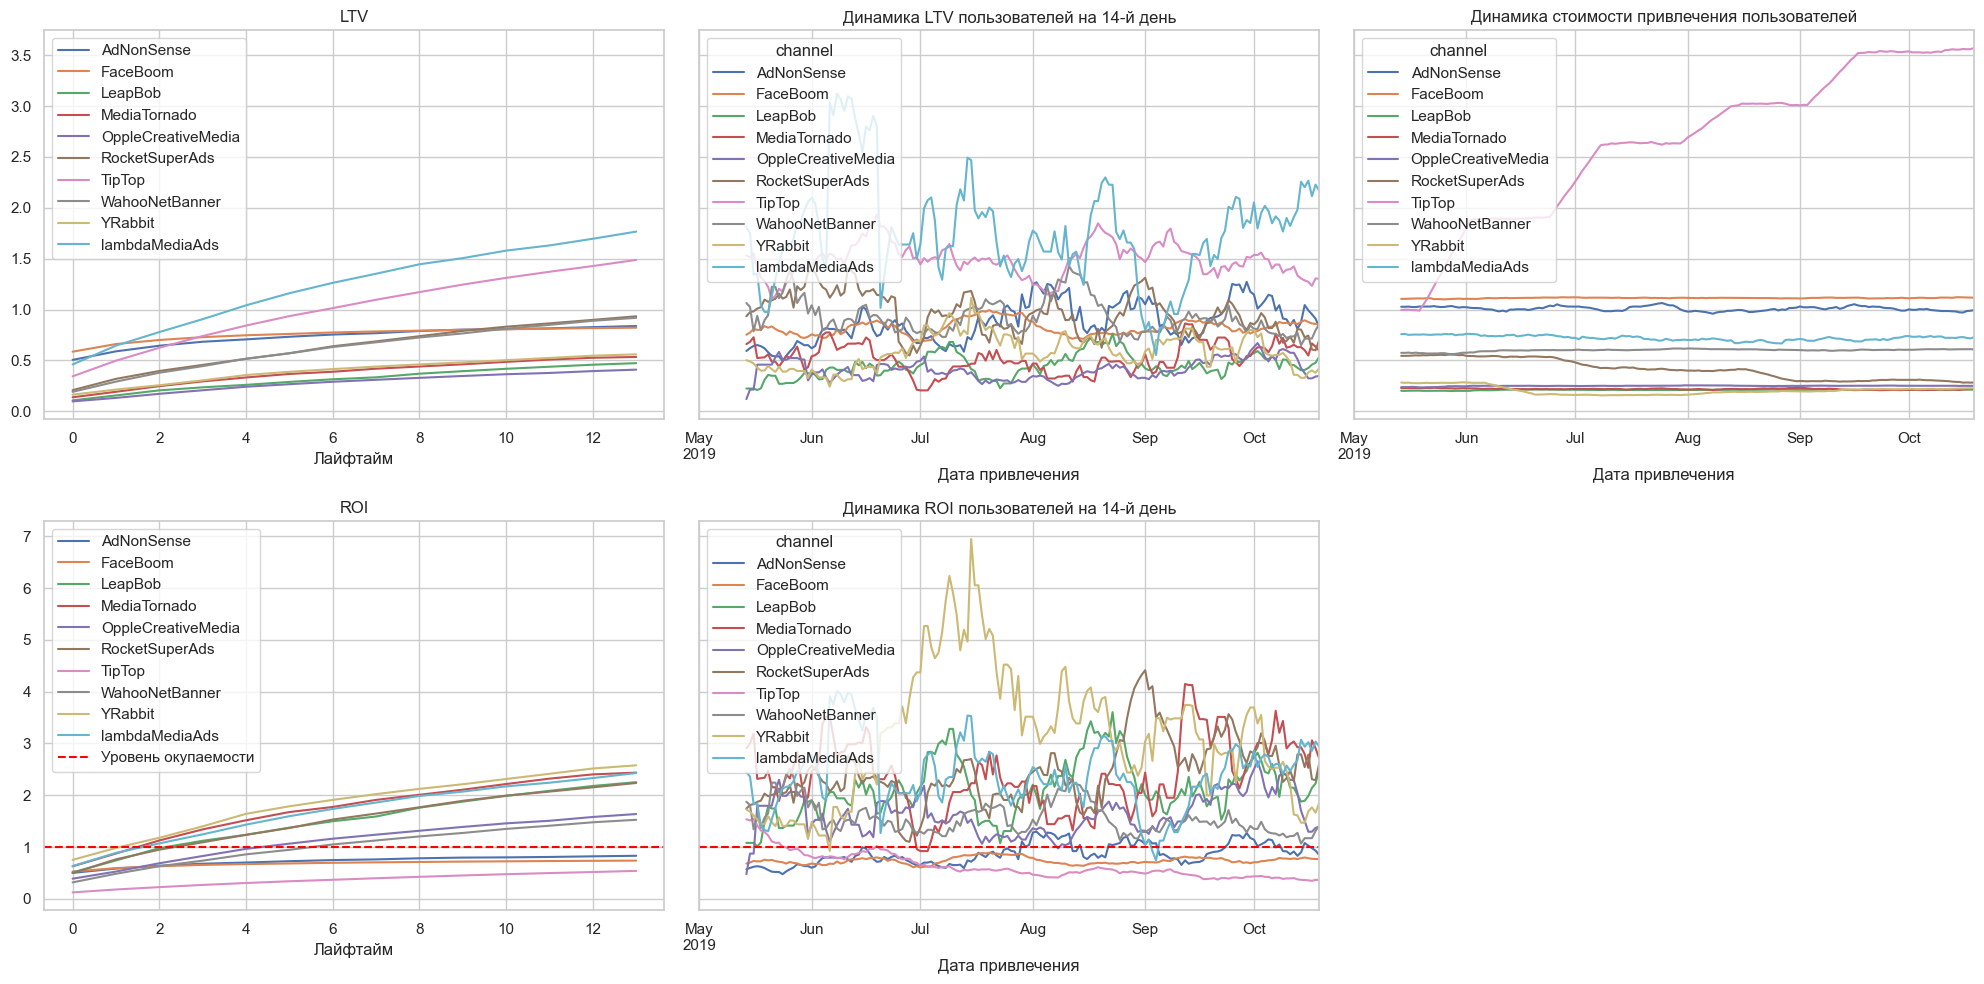

In [46]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы по графику
В разбивке по рекламным источникам не окупились такие источники как AdNonSense, Faceboom и TipTop (ROI на конец второй недели составляет от 50 до 90%) при том, что LTV например у источника TipTop один из самых высоких, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у данного источника рос до конца рекламной компании при том, что стоимость привлечения в других источниках оставалаь на примерно одинаковых уровнях.

### Посчитаем и визуализируем конверсию пользователей с разбивкой по типам устройств пользователей, вызвав ранее созданные функции get_conversion() и plot_conversion()

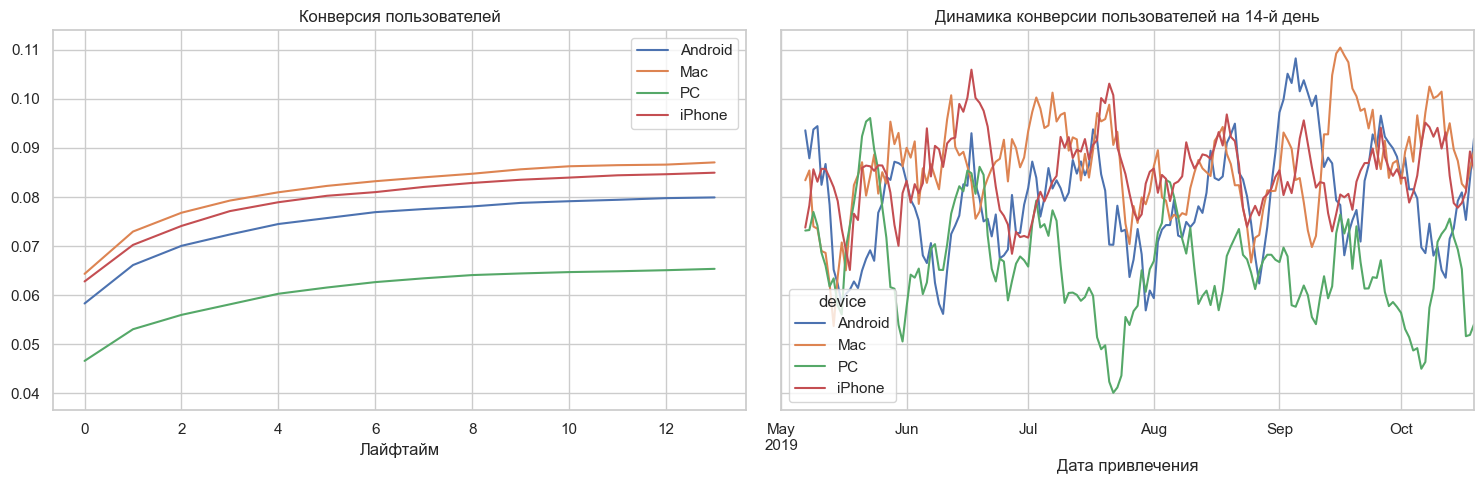

In [47]:
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы по графику
Лучшую конверсию показывают пользователи с MacBook, худшую конверсию показывают пользователи с PC.

### Посчитаем и визуализируем удержание с разбивкой по типам устройств пользователей, вызвав ранее созданные функции get_retention() и plot_retention()

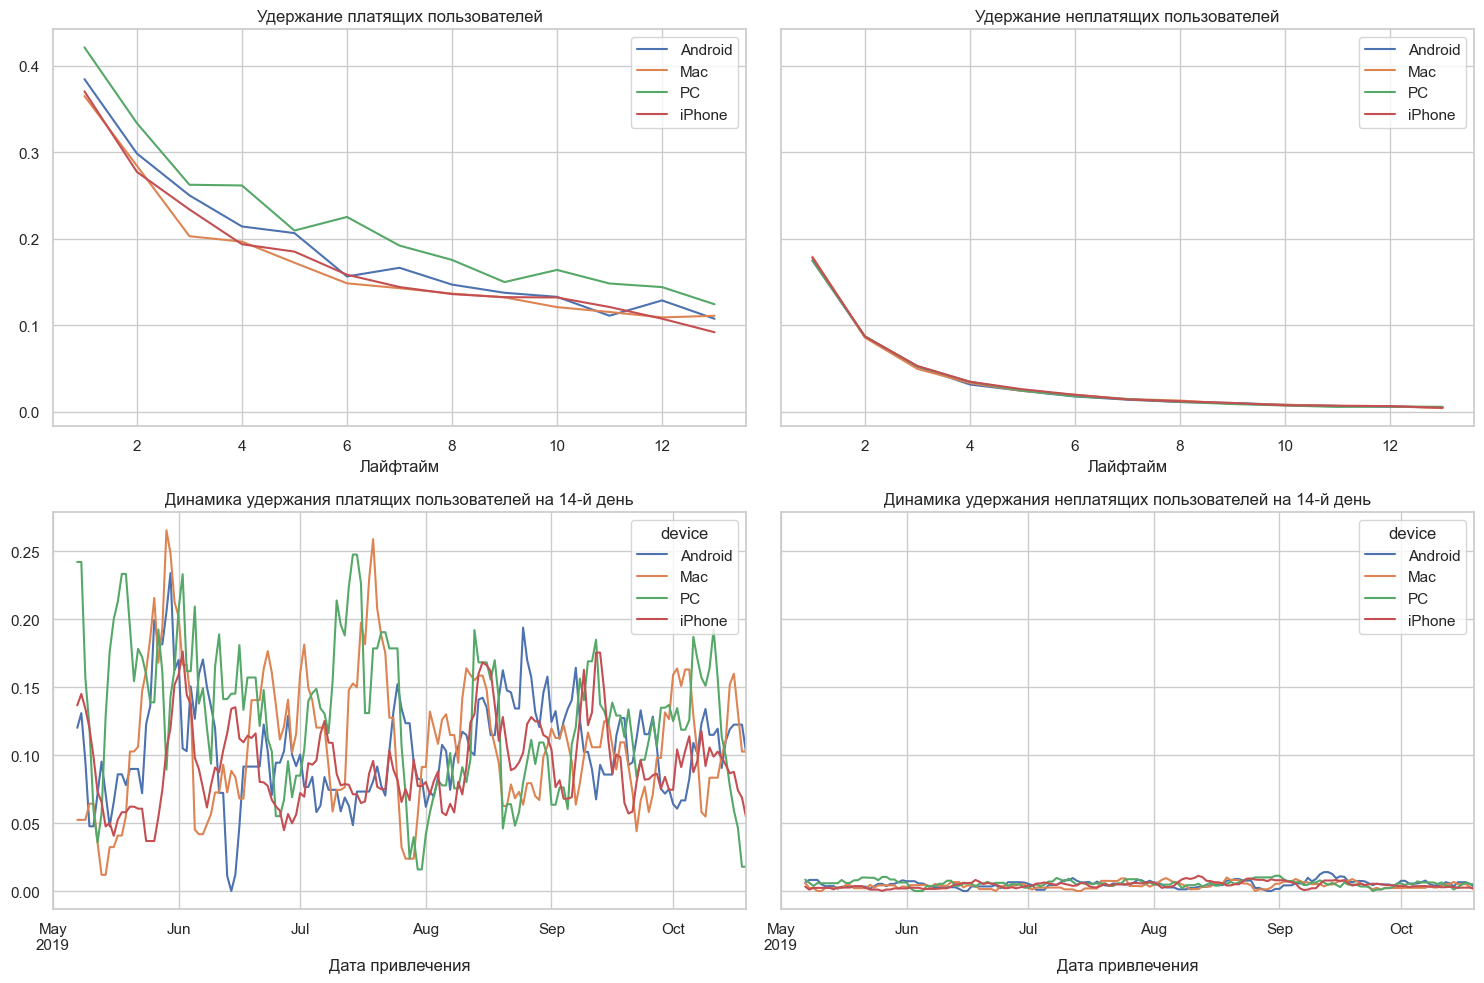

In [48]:
dimensions = ['device']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, \
                                                                    horizon_days,dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Выводы по графику
Среди платящих пользователей лучшее удержание показывают пользователи с PC, однако удержание пользователей с других устройств не сильно меньше и нет явных аутсайдеров.

### Посчитаем и визуализируем конверсию пользователей с разбивкой по странам привлечения пользователей, вызвав ранее созданные функции get_conversion() и plot_conversion()

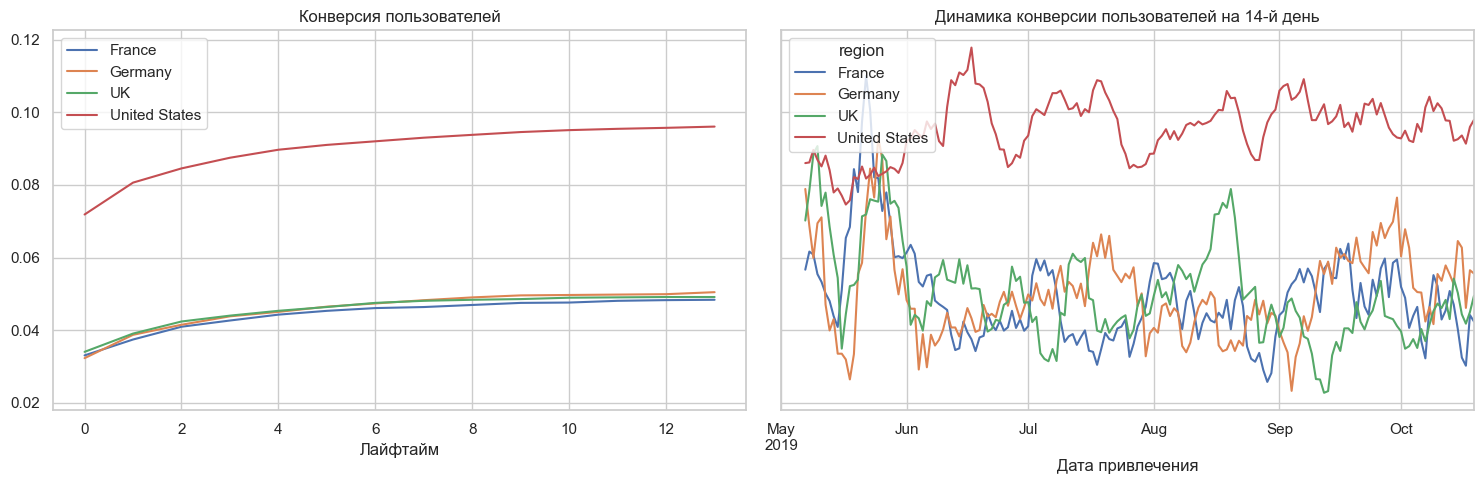

In [49]:
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы по графику
Лучшую конверсию показывают пользователи из США. Конверсия других стран при этом заметно меньше. 

### Посчитаем и визуализируем удержание с разбивкой по странам привлечения, вызвав ранее созданные функции get_retention() и plot_retention()

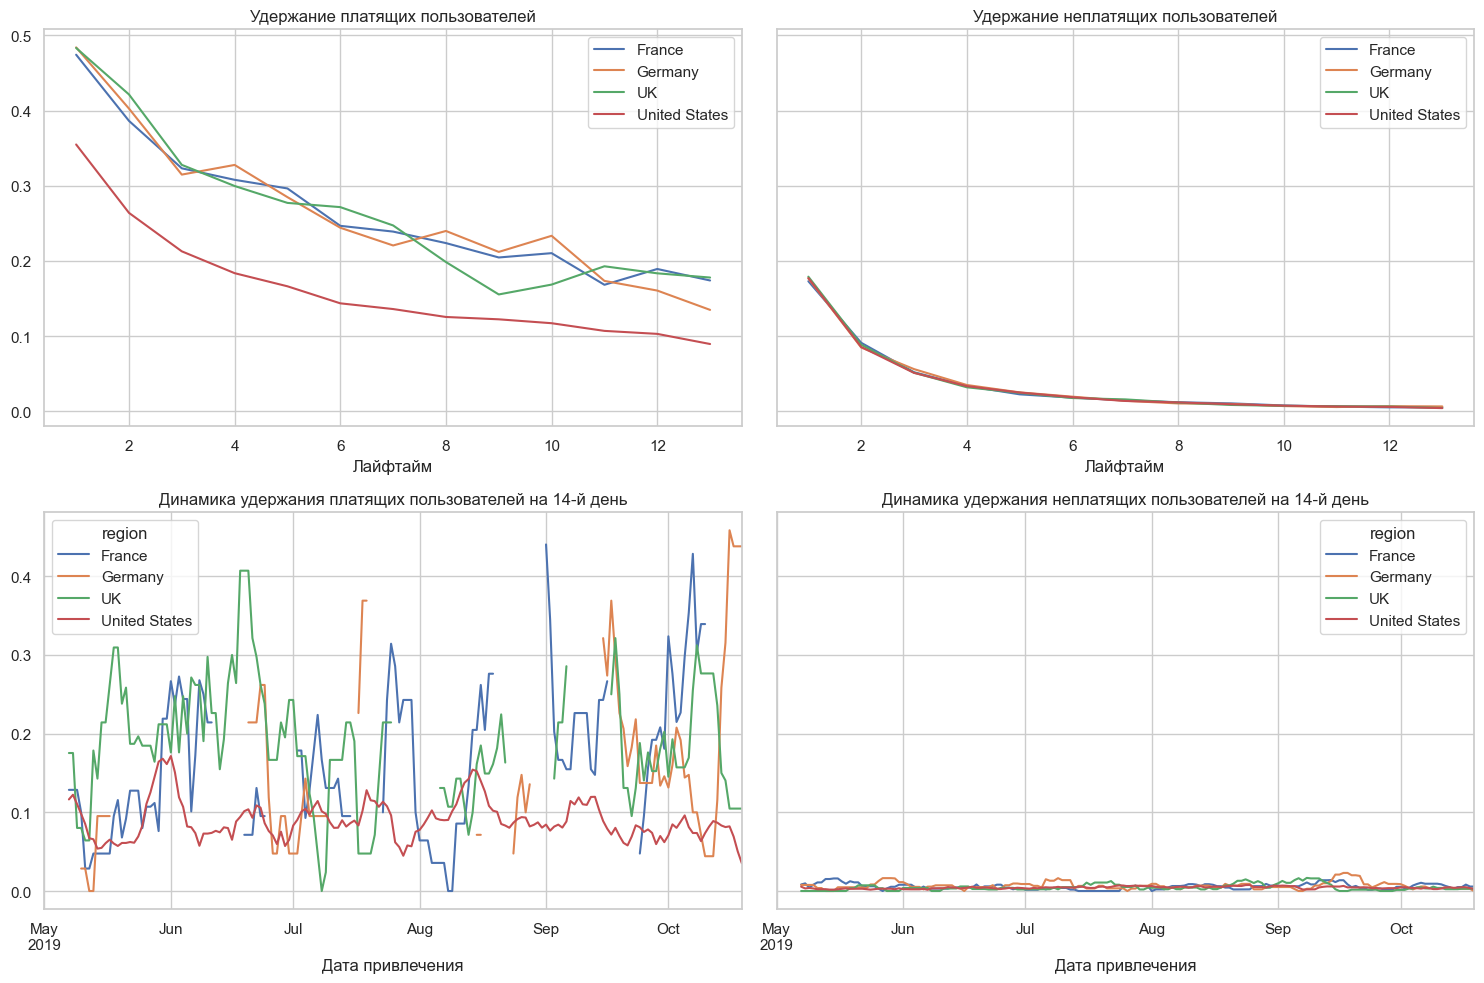

In [50]:
dimensions = ['region']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, \
                                                                    horizon_days,dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Выводы по графику
Среди платящих пользователей худшее удержание показывают пользователи из США. Удержание пользователей из других стран несколько выше.

### Посчитаем и визуализируем конверсию пользователей с разбивкой по рекламным источникам, вызвав ранее созданные функции get_conversion() и plot_conversion()

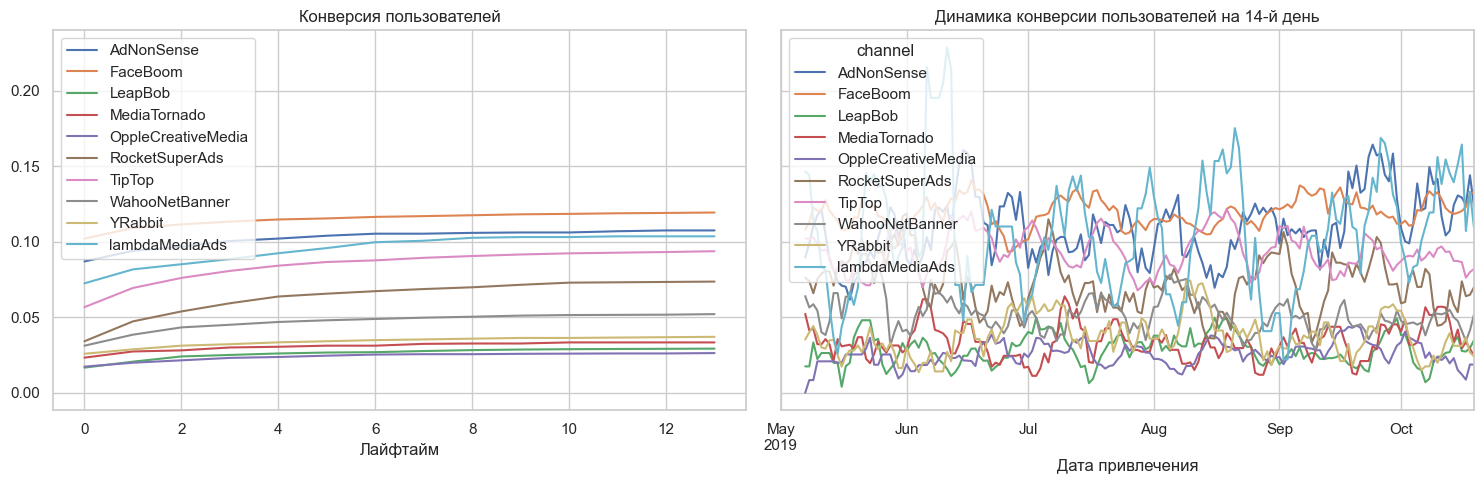

In [51]:
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(profiles, orders, observation_date, \
                                                                        horizon_days, dimensions = dimensions)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

#### Выводы по графику
Лучшую конверсию пользователей показывают такие источники как Faceboom, AdNonSense, lambdaMediaAds и TipTop.

### Посчитаем и визуализируем удержание с разбивкой по рекламным источникам, вызвав ранее созданные функции get_retention() и plot_retention()

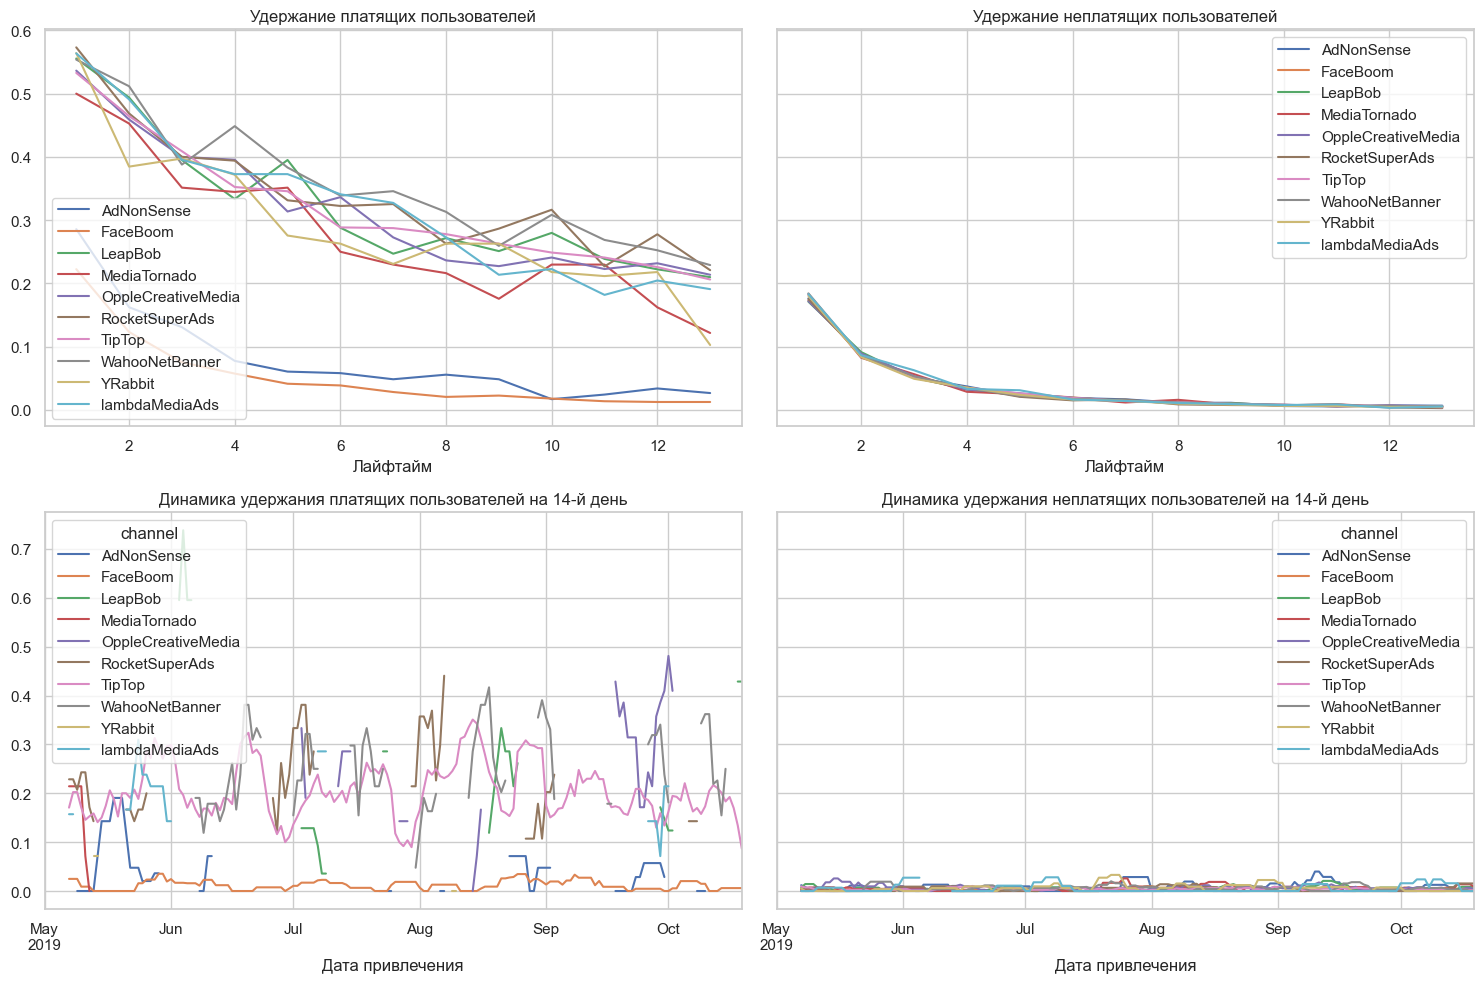

In [52]:
dimensions = ['channel']

retention_raw, retention_grouped, retention_history = get_retention(profiles, visits, observation_date, \
                                                                    horizon_days,dimensions = dimensions)

plot_retention(retention_grouped, retention_history, horizon_days)

#### Выводы по графикам конверсии и удержания с разбивкой по рекламным источникам
Среди платящих пользователей худшее удержание показывают такие источники как AdNonSense и Faceboom. Удержание пользователей из других источников заметно выше.

### Проанализируем отдельно рекламный рынок США и выделим отдельно только пользователей, привлеченных из США

In [53]:
profiles_usa = profiles.query('region == "United States"')

### Рассчитаем и визуализируем LTV и ROI с разбивкой по рекламным источникам только в США, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

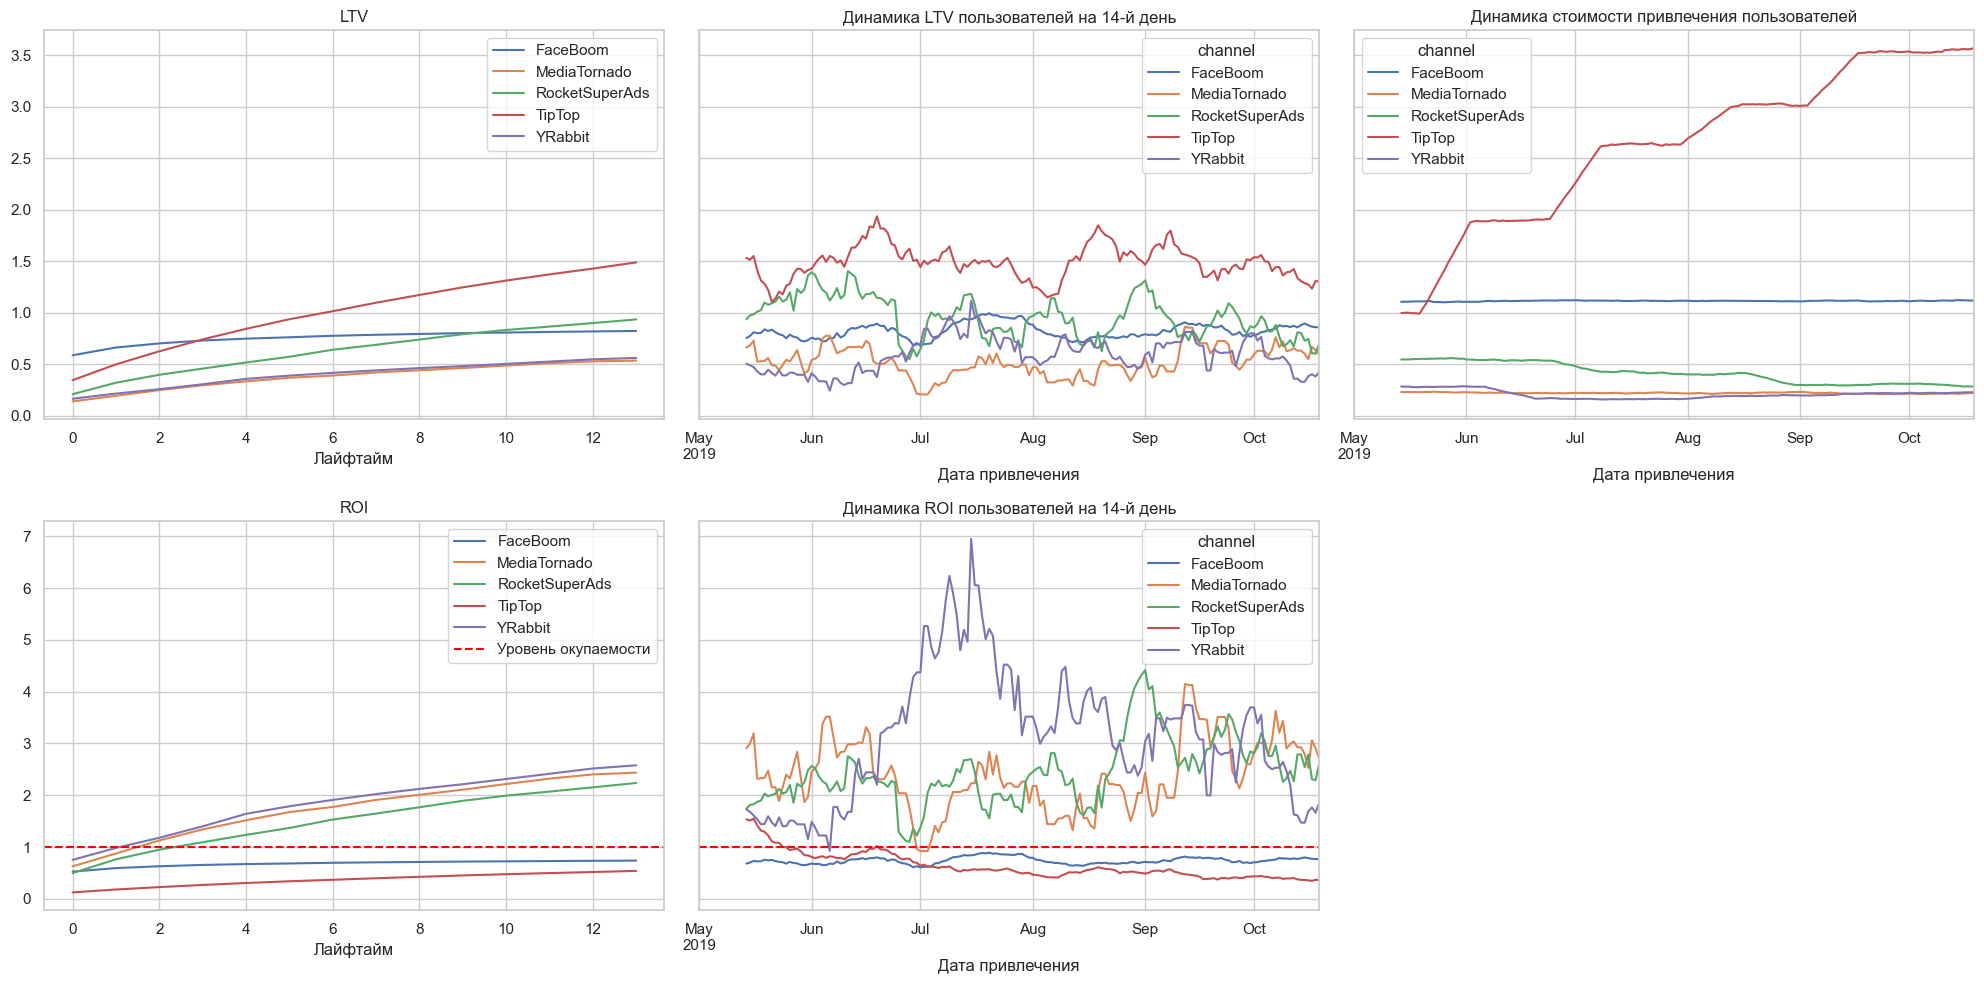

In [54]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_usa, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы по графику
В разбивке по рекламным источникам из США окупились такие источники как YRabbit, MediaTornado и RocketSuperAds (ROI на конец второй недели в данных источниках составляет примерно от 220 до 260%) при том, что LTV у данных источников ниже остальных, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников самый низкий. Не окупились такие источники как Faceboom и TipTop (ROI на конец второй недели в данных источниках составляет примерно от 50 до 70%) при том, что LTV у данных источников один из самых высоких, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников самый высокий.

### Проанализируем отдельно европейский рекламный рынок и выделим отдельно только пользователей, привлеченных из Германии, Великобритании и Франции

In [55]:
profiles_europe = profiles.query('region != "United States"')

### Рассчитаем и визуализируем LTV и ROI с разбивкой по рекламным источникам только из Германии, Великобритании и Франции, вызвав ранее созданные функции get_ltv() и plot_ltv_roi()

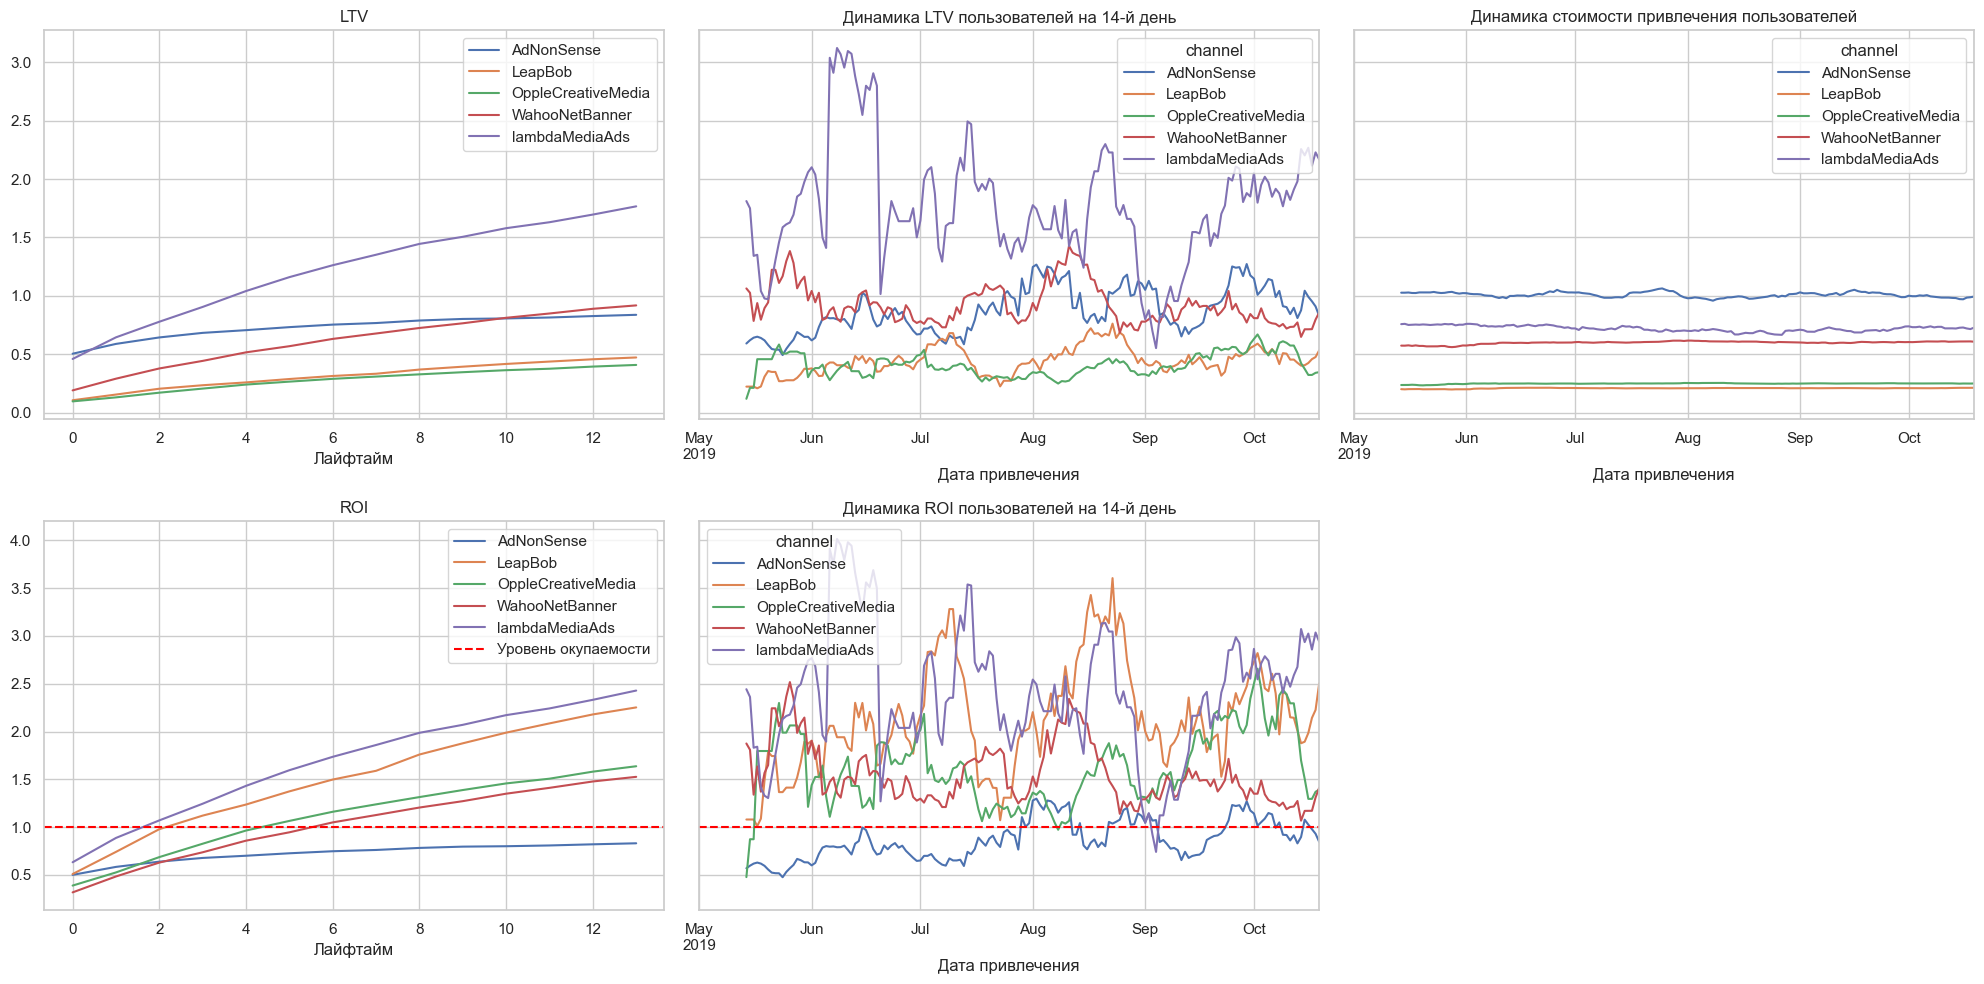

In [56]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_europe, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

#### Выводы по графику
В разбивке по рекламным источникам из Германии, Великобритании и Франции окупились такие источники как LambdaMediaAds, LeapBob, OppleCreativeMedia, WahonNetBanner (ROI на конец второй недели в данных источниках составляет примерно от 150 до 250%). Самый высокий LTV у  источника LambdaMediaAds. На конец второй недели он составлял около 1,75 долларов. У других окупившихся источников LTV ниже в районе от 0,4 до 0,9 долааров. При этом судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников один из самых низких. Не окупился рекламны источники AdNonSense (ROI на конец второй недели в данных источниках составляет примерно 80%) при не самом худшем LTV, составляющем на конец второй недели около 0,8 доллара, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источника самый высокий среди всех остальных.

### Общие выводы по разделу 5

1. В целом рекламная компания не окупилиась. ROI в конце второй недели составлял чуть выше 80%.
2. Стоимость привлечения пользователей (CAC) практически постоянно увеличивалась со старта и до конца рекламной компании, начинаясь примерно с 0,7 долларов на старте и заканчиваясь примерно 1,3 долларами в конце.
3. В динамике LTV не имеет какой-либо четкой направленности к снижению или падению и в среднем составляла около 0.9 долларов.
4. Судя по динамие ROI пользователей на 14 день рекламная компания окупалась примерно до середины июня. После этого времени далее она оставалсь убыточной.
5. В разбивке по устройствам окупились только пользователи с PC. Их окупаемось составила около 105%. Пользователи с Android, MacBook и Iphone не окупились. Самая низкая стоимость привлечения пользователей именно с PC. На пике в середине сентября она составляла около 0,9 долларов. При этом LTV пользователей с PC немного ниже остальных.
6. В разбивке по странам привлечения окупились все страны кроме США (ROI на конец второй недели составляет около 60%) при том, что LTV у данных пользователей самый высокий. При этом судя под динамике стоимости привлечения пользователей (CAC) у пользователей из США этот показатель постоянно рос практически до конца рекламной компании.
7. В разбивке по рекламным источникам не окупились такие источники как AdNonSense, Faceboom и TipTop (ROI на конец второй недели составляет от 50 до 90%) при том, что LTV например у источника TipTop один из самых высоких, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у данного источника рос до конца рекламной компании при том, что стоимость привлечения в других источниках оставалаь на примерно одинаковых уровнях.
8. Судя по конверсии и удержании пользователей по устройствам лучшую конверсию показывают пользователи с MacBook, худшую конверсию показывают пользователи с PC. При этом среди платящих пользователей лучшее удержание показывают пользователи с PC, однако удержание пользователей с других устройств не сильно меньше и нет явных аутсайдеров.
9. Судя по конверсии и удержании пользователей по странам привлечения лучшую конверсию показывают пользователи из США. Конверсия других стран при этом заметно меньше. При этом среди платящих пользователей худшее удержание показывают пользователи из США. Удержание пользователей из других стран несколько выше.
10. Судя по конверсии и удержании пользователей по рекламным источникам лучшую конверсию пользователей показывают такие источники как Faceboom, AdNonSense, lambdaMediaAds и TipTop. При этом среди платящих пользователей худшее удержание показывают такие источники как AdNonSense и Faceboom. Удержание пользователей из других источников заметно выше.
11. В разбивке по рекламным источникам из США окупились такие источники как YRabbit, MediaTornado и RocketSuperAds (ROI на конец второй недели в данных источниках составляет примерно от 220 до 260%) при том, что LTV у данных источников ниже остальных, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников самый низкий. Не окупились такие источники как Faceboom и TipTop (ROI на конец второй недели в данных источниках составляет примерно от 50 до 70%) при том, что LTV у данных источников один из самых высоких, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников самый высокий.
12. В разбивке по рекламным источникам из Германии, Великобритании и Франции окупились такие источники как LambdaMediaAds, LeapBob, OppleCreativeMedia, WahonNetBanner (ROI на конец второй недели в данных источниках составляет примерно от 150 до 250%). Самый высоки LTV у источника LambdaMediaAds. На конец второй недели он составлял около 1,75 долларов. У других окупившихся источников LTV ниже в районе от 0,4 до 0,9 долааров. При этом судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источников один из самых низких. Не окупилися источник AdNonSense (ROI на конец второй недели в данных источниках составляет примерно 80%) при не самом худшем LTV, составляющем на конец второй недели около 0,8 доллара, однако судя по динамике стоимости привлечения пользователей (CAC) этот показатель у указанных источника самый высокий среди всех остальных.

## Общие выводы

### Проведенная работа над данными

1. Изучена общая информация о представленных данных.
2. В данных были проанализированы пропуски и дубликаты.
3. Для удобства работы с датафреймами названия некоторых столбцов были переименованы в нижний регистр с нижним подчеркиванием между словами. Для дальнейшего анализа в датафреймах были изменены типы данных в некоторых столбцах и добавлены новые столбцы.
4. Для последующего анализа были созданы специальные функции для создания профилей пользователей, подсчета метрик LTC, ROI, CAC и построения соответствующих графиков.

### Выводы по итогу анализа данных

1. Всего насчитывается 150 008 пользователей, которые пришли в приложение Procrastinate Pro+. Из них количество платящих пользователей составляет 8881 или 5.92 %.
2. Минимальная дата привлечения пользователей 01.05.2019. Максимальная дата привлечения пользователей 27.10.2019.
3. Пользователи приходили из США, Германии, Великобритании и Франции. Больше всего платящих пользователей в приложение пришло из США. Меньше всего пришло из Франции.
4. Пользователи пользуются такими устройствами как MacBook, iPhone, Android и персональными компьютерами. Платящие пользователи предпочитают устройства типа MacBook.
5. Пользователи привлекались через 10 различных рекламных источников. Наибольшая доля платящих пользователей была привлечена через такие рекламные источники как FaceBoom AdNonSense и lambdaMediaAds.
6. Всего на маркетинг было потрачено 105497.3 долларов.
7. Самые крупны рекламные источники с точки зрения расходов - это TipTop. Второй рекламнй источник по расходам - FaceBoom.
8. В течении всей рекламной кампании расходы на рекламу в рекламнных источниках TipTop и FaceBoom росли. Расходы в других рекламных источниках в течении всей рекламной кампании оставались примерно на одном и том же уровне.
9. Наибольшая средняя стоимость привлечения одного пользователя отмечается в рекламном источниках TipTop, FaceBoom и AdNonSense. Наименьшая стоимость в источнике YRabbit.
10. В целом рекламная компания не окупилиась. ROI в конце второй недели составлял чуть выше 80%.
11. Стоимость привлечения пользователей (CAC) практически постоянно увеличивалась со старта и до конца рекламной компании.
12. В динамике LTV не имеет какой-либо четкой направленности к снижению или падению.
13. Рекламная компания окупалась примерно до середины июня. После этого времени далее она оставалсь убыточной.
14. По устройствам окупились только пользователи с PC. Пользователи с других устройств не окупились. Это связано в первую очередь с более высокой стоимостью привлечения среди других устройств и чуть меньшим удержанием пользователей среди платящих. 
15. По странам привлечения окупились все страны кроме США. Это связано в первую очередь со стоимостью привлечения пользователей (CAC), так как для пользователей из США этот показатель постоянно рос практически до конца рекламной компании и худшим удержанием среди платящих пользователей.
16. По рекламным источникам не окупились такие источники как AdNonSense, Faceboom и TipTop. Это свяжано первую очередь с тем, что по динамике стоимости привлечения пользователей (CAC) данный показатель у источника TipTop рос до конца рекламной компании при том, что стоимость привлечения в других источниках оставалась на примерно одинаковых уровнях, а также более низким удержанием пользователей у таких источников как AdNonSense и Faceboom.
17. В разбивке по рекламным источникам из США окупились такие источники как YRabbit, MediaTornado и RocketSuperAds. Не окупились такие источники как Faceboom и TipTop из-за высокой стоимости привлечения при относительно неплохом LTV.
18. В разбивке по рекламным источникам из Германии, Великобритании и Франции окупились такие источники как LambdaMediaAds, LeapBob, OppleCreativeMedia и WahonNetBanner. Не окупилися источник AdNonSense из-за высокой стоимости привлечения при относительно неплохом LTV.

### Рекомендации для отдела маркетинга

В качестве рекомедаций для отдела маркетинга можно предолжить следующее:
1. Привлекать пользователей только с персональных компьютеров.
2. В рекламнных источниках из США перевести бюджет на такие источники как YRabbit, MediaTornado и RocketSuperAds и исключить из бюджета источники Faceboom и TipTop.
3. В рекламнных источниках из Европы перевести бюджет на такие источники как LambdaMediaAds, LeapBob, OppleCreativeMedia и WahonNetBanner и исключить из бюджета источники AdNonSense.